In [ ]:
!pip install pandas_datareader
!pip install tsfresh

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 95.8/95.8 kB 4.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 176.5/176.5 kB 10.5 MB/s eta 0:00:00


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt

from tsfresh import extract_features, select_features
from tsfresh.utilities.dataframe_functions import roll_time_series, make_forecasting_frame
from tsfresh.utilities.dataframe_functions import impute

import pandas_datareader.data as web

from sklearn.linear_model import LinearRegression

In [ ]:
df = web.DataReader("TSLA.US", 'stooq')["Close"]
df.head()

,Close
Date,
2024-07-31,232.10
2024-07-30,222.62
2024-07-29,232.10
2024-07-26,219.80
2024-07-25,220.25


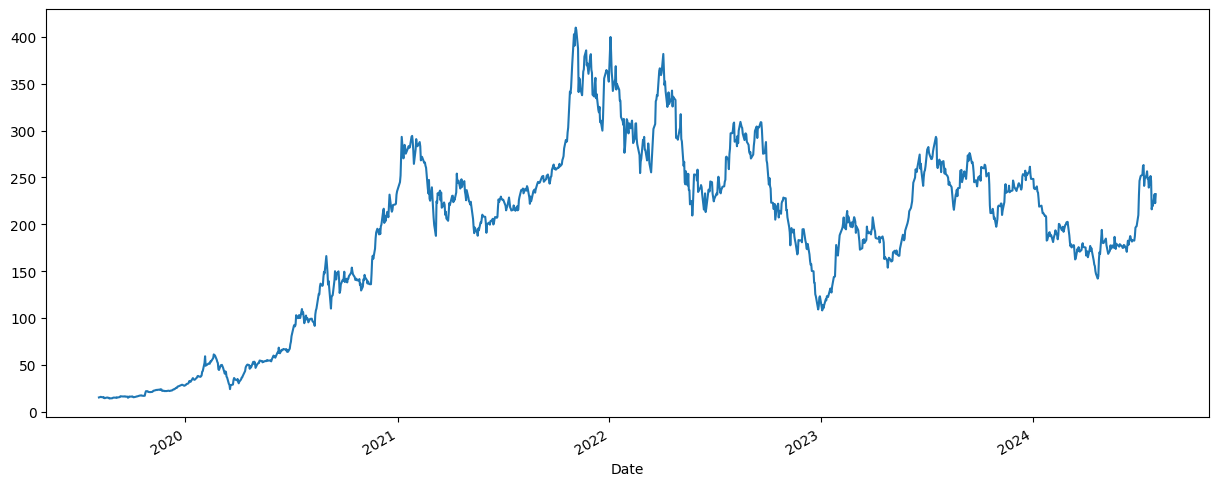

In [ ]:
plt.figure(figsize=(15, 6))
df.plot(ax=plt.gca())
plt.show()

In [ ]:
df_1 = pd.DataFrame({"Close": df.copy()})
df_1["date"] = df_1.index
df_1["Symbols"] = "TSLA.US"

df_1.head()

,Close,date,Symbols
Date,,,
2024-07-31,232.10,2024-07-31,TSLA.US
2024-07-30,222.62,2024-07-30,TSLA.US
2024-07-29,232.10,2024-07-29,TSLA.US
2024-07-26,219.80,2024-07-26,TSLA.US
2024-07-25,220.25,2024-07-25,TSLA.US


In [ ]:
df_rolled = roll_time_series(df_1, column_id="Symbols", column_sort="date",
                             max_timeshift=20, min_timeshift=5)

/usr/local/lib/python3.10/dist-packages/tsfresh/utilities/dataframe_functions.py:520: UserWarning: Your time stamps are not uniformly sampled, which makes rolling nonsensical in some domains.
  warnings.warn(
Rolling: 100%|██████████| 1256/1256 [00:02<00:00, 455.46it/s]


In [ ]:
df_rolled.head()

,Close,date,Symbols,id
0,15.2213,2019-08-05,TSLA.US,"(TSLA.US, 2019-08-12 00:00:00)"
1,15.3833,2019-08-06,TSLA.US,"(TSLA.US, 2019-08-12 00:00:00)"
2,15.5613,2019-08-07,TSLA.US,"(TSLA.US, 2019-08-12 00:00:00)"
3,15.8867,2019-08-08,TSLA.US,"(TSLA.US, 2019-08-12 00:00:00)"
4,15.6673,2019-08-09,TSLA.US,"(TSLA.US, 2019-08-12 00:00:00)"


In [ ]:
df_rolled[df_rolled["id"] == ("TSLA.US", pd.to_datetime("2020-07-14"))]

,Close,date,Symbols,id
4752,66.0600,2020-06-15,TSLA.US,"(TSLA.US, 2020-07-14 00:00:00)"
4753,65.4767,2020-06-16,TSLA.US,"(TSLA.US, 2020-07-14 00:00:00)"
4754,66.1200,2020-06-17,TSLA.US,"(TSLA.US, 2020-07-14 00:00:00)"
4755,66.9300,2020-06-18,TSLA.US,"(TSLA.US, 2020-07-14 00:00:00)"
4756,66.7267,2020-06-19,TSLA.US,"(TSLA.US, 2020-07-14 00:00:00)"
4757,66.2867,2020-06-22,TSLA.US,"(TSLA.US, 2020-07-14 00:00:00)"
4758,66.7867,2020-06-23,TSLA.US,"(TSLA.US, 2020-07-14 00:00:00)"
4759,64.0567,2020-06-24,TSLA.US,"(TSLA.US, 2020-07-14 00:00:00)"
4760,65.7333,2020-06-25,TSLA.US,"(TSLA.US, 2020-07-14 00:00:00)"
4761,63.9833,2020-06-26,TSLA.US,"(TSLA.US, 2020-07-14 00:00:00)"


In [ ]:
df_1[(df_1["date"] <= pd.to_datetime("2020-07-14")) &
          (df_1["date"] >= pd.to_datetime("2020-06-15")) &
          (df_1["Symbols"] == "TSLA.US")]

,Close,date,Symbols
Date,,,
2020-07-14,101.1200,2020-07-14,TSLA.US
2020-07-13,99.8033,2020-07-13,TSLA.US
2020-07-10,102.9770,2020-07-10,TSLA.US
2020-07-09,92.9533,2020-07-09,TSLA.US
2020-07-08,91.0600,2020-07-08,TSLA.US
2020-07-07,92.6567,2020-07-07,TSLA.US
2020-07-06,91.4400,2020-07-06,TSLA.US
2020-07-02,80.5767,2020-07-02,TSLA.US
2020-07-01,74.6433,2020-07-01,TSLA.US


In [ ]:
X = extract_features(df_rolled.drop("Symbols", axis=1),
                     column_id="id", column_sort="date", column_value="Close",
                     impute_function=impute, show_warnings=False)

Feature Extraction: 100%|██████████| 1251/1251 [01:22<00:00, 15.17it/s]


In [ ]:
X.head()

Close__variance_larger_than_standard_deviation  \
TSLA.US 2019-08-12                                             0.0   
        2019-08-13                                             0.0   
        2019-08-14                                             0.0   
        2019-08-15                                             0.0   
        2019-08-16                                             0.0   

                    Close__has_duplicate_max  Close__has_duplicate_min  \
TSLA.US 2019-08-12                       0.0                       0.0   
        2019-08-13                       0.0                       0.0   
        2019-08-14                       0.0                       0.0   
        2019-08-15                       0.0                       0.0   
        2019-08-16                       0.0                       0.0   

                    Close__has_duplicate  Close__sum_values  \
TSLA.US 2019-08-12                   0.0            92.9872   
        2019-08-13                   0.0           108.6539   
        2019-08-14                   0.0           123.2952   
        2019-08-15                   0.0           137.6712   
        2019-08-16                   0.0           152.3339   

                    Close__abs_energy  Close__mean_abs_change  \
TSLA.US 2019-08-12        1441.429926                0.256960   
        2019-08-13        1686.875415                0.280700   
        2019-08-14        1901.243080                0.387086   
        2019-08-15        2107.912456                0.371862   
        2019-08-16        2322.907228                0.362400   

                    Close__mean_change  Close__mean_second_derivative_central  \
TSLA.US 2019-08-12            0.009200                              -0.070250   
        2019-08-13            0.074233                               0.023740   
        2019-08-14           -0.082857                              -0.098950   
        2019-08-15           -0.105662                              -0.030521   
        2019-08-16           -0.062067                               0.007794   

                    Close__median  ...  Close__fourier_entropy__bins_5  \
TSLA.US 2019-08-12        15.4723  ...                        1.039721   
        2019-08-13        15.5613  ...                        1.039721   
        2019-08-14        15.4723  ...                        1.332179   
        2019-08-15        15.3833  ...                        1.332179   
        2019-08-16        15.3253  ...                        1.011404   

                    Close__fourier_entropy__bins_10  \
TSLA.US 2019-08-12                         1.039721   
        2019-08-13                         1.386294   
        2019-08-14                         1.332179   
        2019-08-15                         1.332179   
        2019-08-16                         1.011404   

                    Close__fourier_entropy__bins_100  \
TSLA.US 2019-08-12                          1.386294   
        2019-08-13                          1.386294   
        2019-08-14                          1.609438   
        2019-08-15                          1.609438   
        2019-08-16                          1.560710   

                    Close__permutation_entropy__dimension_3__tau_1  \
TSLA.US 2019-08-12                                        1.039721   
        2019-08-13                                        1.332179   
        2019-08-14                                        1.560710   
        2019-08-15                                        1.549826   
        2019-08-16                                        1.732868   

                    Close__permutation_entropy__dimension_4__tau_1  \
TSLA.US 2019-08-12                                        1.098612   
        2019-08-13                                        1.386294   
        2019-08-14                                        1.609438   
        2019-08-15                                        1.791759   
        2019-

In [ ]:
X = X.set_index(X.index.map(lambda x: x[1]), drop=True)
X.index.name = "last_date"
X.head()

,Close__variance_larger_than_standard_deviation,Close__has_duplicate_max,Close__has_duplicate_min,Close__has_duplicate,Close__sum_values,Close__abs_energy,Close__mean_abs_change,Close__mean_change,Close__mean_second_derivative_central,Close__median,...,Close__fourier_entropy__bins_5,Close__fourier_entropy__bins_10,Close__fourier_entropy__bins_100,Close__permutation_entropy__dimension_3__tau_1,Close__permutation_entropy__dimension_4__tau_1,Close__permutation_entropy__dimension_5__tau_1,Close__permutation_entropy__dimension_6__tau_1,Close__permutation_entropy__dimension_7__tau_1,Close__query_similarity_count__query_None__threshold_0.0,Close__mean_n_absolute_max__number_of_maxima_7
last_date,,,,,,,,,,,,,,,,,,,,,
2019-08-12,0.0,0.0,0.0,0.0,92.9872,1441.429926,0.256960,0.009200,-0.070250,15.4723,...,1.039721,1.039721,1.386294,1.039721,1.098612,0.693147,-0.000000,2.708050,0.0,225.493429
2019-08-13,0.0,0.0,0.0,0.0,108.6539,1686.875415,0.280700,0.074233,0.023740,15.5613,...,1.039721,1.386294,1.386294,1.332179,1.386294,1.098612,0.693147,-0.000000,0.0,225.493429
2019-08-14,0.0,0.0,0.0,0.0,123.2952,1901.243080,0.387086,-0.082857,-0.098950,15.4723,...,1.332179,1.332179,1.609438,1.560710,1.609438,1.386294,1.098612,0.693147,0.0,15.521986
2019-08-15,0.0,0.0,0.0,0.0,137.6712,2107.912456,0.371862,-0.105662,-0.030521,15.3833,...,1.332179,1.332179,1.609438,1.549826,1.791759,1.609438,1.386294,1.098612,0.0,15.521986
2019-08-16,0.0,0.0,0.0,0.0,152.3339,2322.907228,0.362400,-0.062067,0.007794,15.3253,...,1.011404,1.011404,1.560710,1.732868,1.945910,1.791759,1.609438,1.386294,0.0,15.521986


In [ ]:
y = df_1.set_index("date").sort_index().Close.shift(-1)

In [ ]:
y = y[y.index.isin(X.index)]
X = X[X.index.isin(y.index)]

In [ ]:
X[:"2022"]

,Close__variance_larger_than_standard_deviation,Close__has_duplicate_max,Close__has_duplicate_min,Close__has_duplicate,Close__sum_values,Close__abs_energy,Close__mean_abs_change,Close__mean_change,Close__mean_second_derivative_central,Close__median,...,Close__fourier_entropy__bins_5,Close__fourier_entropy__bins_10,Close__fourier_entropy__bins_100,Close__permutation_entropy__dimension_3__tau_1,Close__permutation_entropy__dimension_4__tau_1,Close__permutation_entropy__dimension_5__tau_1,Close__permutation_entropy__dimension_6__tau_1,Close__permutation_entropy__dimension_7__tau_1,Close__query_similarity_count__query_None__threshold_0.0,Close__mean_n_absolute_max__number_of_maxima_7
last_date,,,,,,,,,,,,,,,,,,,,,
2019-08-12,0.0,0.0,0.0,0.0,92.9872,1441.429926,0.256960,0.009200,-0.070250,15.4723,...,1.039721,1.039721,1.386294,1.039721,1.098612,0.693147,-0.000000,2.708050,0.0,225.493429
2019-08-13,0.0,0.0,0.0,0.0,108.6539,1686.875415,0.280700,0.074233,0.023740,15.5613,...,1.039721,1.386294,1.386294,1.332179,1.386294,1.098612,0.693147,-0.000000,0.0,225.493429
2019-08-14,0.0,0.0,0.0,0.0,123.2952,1901.243080,0.387086,-0.082857,-0.098950,15.4723,...,1.332179,1.332179,1.609438,1.560710,1.609438,1.386294,1.098612,0.693147,0.0,15.521986
2019-08-15,0.0,0.0,0.0,0.0,137.6712,2107.912456,0.371862,-0.105662,-0.030521,15.3833,...,1.332179,1.332179,1.609438,1.549826,1.791759,1.609438,1.386294,1.098612,0.0,15.521986
2019-08-16,0.0,0.0,0.0,0.0,152.3339,2322.907228,0.362400,-0.062067,0.007794,15.3253,...,1.011404,1.011404,1.560710,1.732868,1.945910,1.791759,1.609438,1.386294,0.0,15.521986
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-23,1.0,0.0,0.0,1.0,3486.8800,588774.570600,5.042500,-2.985500,-0.059474,173.4400,...,0.304636,0.304636,1.159589,1.294775,1.950527,2.313154,2.599302,2.708050,0.0,187.617143
2022-12-27,1.0,0.0,0.0,1.0,3413.1200,567239.601000,5.742000,-3.691000,-0.314737,167.8200,...,0.304636,0.304636,1.366711,1.236793,1.783073,2.165976,2.479956,2.615631,0.0,187.182857
2022-12-28,1.0,0.0,0.0,1.0,3342.9100,546483.418700,5.818000,-3.406000,-0.270000,160.9500,...,0.304636,0.304636,1.294545,1.236793,1.706057,2.084430,2.479956,2.615631,0.0,186.630000


In [ ]:
X_train = X[:"2022"]
X_test = X["2023":]

y_train = y[:"2022"]
y_test = y["2023":]

In [ ]:
X_train_selected = select_features(X_train, y_train)

In [ ]:
ada = LinearRegression()

ada.fit(X_train_selected, y_train)

LinearRegression()

In [ ]:
X_test_selected = X_test[X_train_selected.columns]

y_pred = pd.Series(ada.predict(X_test_selected), index=X_test_selected.index)

<Axes: xlabel='last_date'>

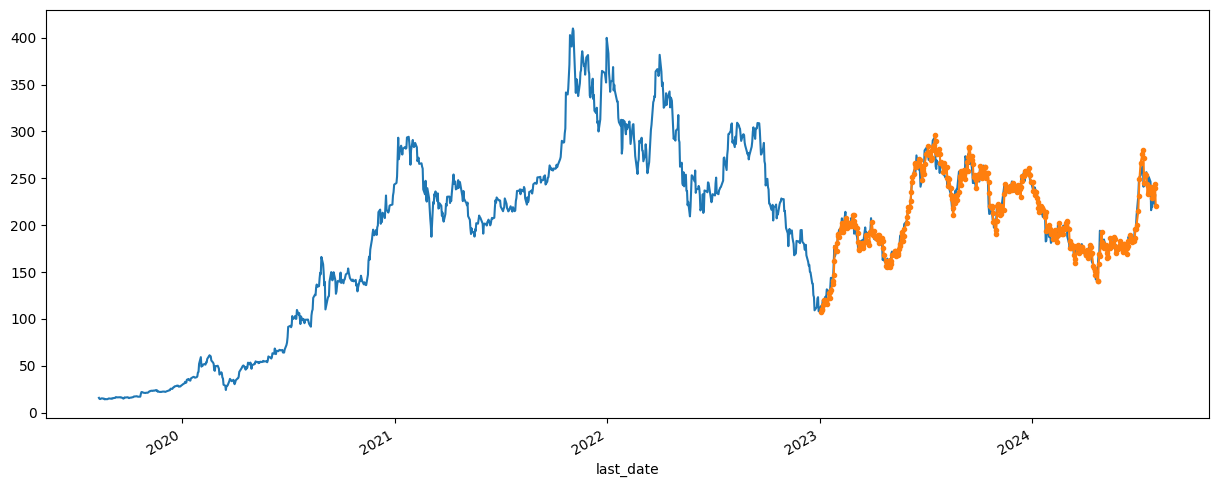

In [ ]:
plt.figure(figsize=(15, 6))

y.plot(ax=plt.gca())
y_pred.plot(ax=plt.gca(), legend=None, marker=".")